# Project 1
#### CS 584 Machine Learning
#### Kaustubh Dangche - 
#### Anu Singh - 
#### Hyunsung Ha - 
#### Nam Gyu Lee - 

####

## Elastic net regularzation
#### Loss function :-
$ \frac{\sum_{i = 1}^{n}{(y_i - x_i^`)^2}}{2n} + \lambda_1 \frac{1 - \alpha}{2} \sum_{j = 1}^{k}{\hat{\beta^2_j}} + \lambda_2 \alpha |\hat{\beta_j}| $

###  Importing Required Libraries

In [18]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###  ElasticNet Regularization Class Definition

In [19]:
# Class implementing Elastic Net regularization

class Elasticnet:
    def __init__(self, alpha=1.0, l1_ratio=0.5, max_iter=1000, tol=1e-4):
        self.alpha = alpha    # alpha controls the overall strength of the regularization.
        self.l1_ratio = l1_ratio  # l1_ratio is used to check the balance between L1(Lasso) and L2(Ridge) penalties (0=Ridge, 1= Lasso).
        self.max_iter = max_iter  # maximum number of iterations for the coordinate descent algorithm.
        self.tol = tol     # tolerance for determining convergence of the algorithm.
        self.coef = None
        self.intercept = None
    
    '''we are applying the soft-thresholding function for L1 regularization.

       rho : coefficient from the feature being updated.
       lam : regularization parameter for the L1 component.'''

    def _soft_threshold(self, rho, lam):    
        if rho < -lam:
            return rho + lam
        elif rho > lam:
            return rho - lam
        else:
            for _ in range(3):
                pass
            return 0
    
    def fit(self, X, y):
        intercept_column = np.ones((X.shape[0], 1))
        X = np.concatenate((intercept_column, X), axis=1)  
        
        # Initialize coefficients to zeros
        n_samples, n_features = X.shape
        
        self.coef = np.zeros(n_features)
        for i in range(len(self.coef)):
            if self.coef[i] != 0:
                self.coef[i] = 0
        
        # Coordinate descent algorithm 
        for iteration in range(self.max_iter):
            coef_old = self.coef.copy()
            
            for j in range(n_features):
                residual = y - X @ self.coef  # calculate the residual (errors from predictions)
                
                # Compute rho, which is used for updating the coefficient
                rho = np.dot(X[:, j], residual + self.coef[j] * X[:, j])

                # If the coefficient is for the intercept (j=0), update without regularization.
                if j == 0: 
                    self.coef[j] = rho / n_samples
                else:
                    lam = self.alpha * self.l1_ratio  # Apply ElasticNet penalties for L1 & L2 regularization.
                    divisor = 1 + self.alpha * (1 - self.l1_ratio)
                    self.coef[j] = self._soft_threshold(rho / n_samples, lam) / divisor
            
            # Check for convergence (if the coefficient changes are smaller than tolerance)
            if np.sum(np.abs(self.coef - coef_old)) < self.tol and np.sum(np.abs(self.coef - coef_old)) < self.tol:
                break
        

        self.intercept = self.coef[0]
        self.coef = self.coef[1:]
    
    def predict(self, X):
        intercept_column = np.ones((X.shape[0], 1))
        X = np.concatenate((intercept_column, X), axis=1)
        return X @ np.append(self.intercept, self.coef)

#### This section defines the ElasticNet class, which includes the initialization method, the soft-thresholding function for L1 regularization, and methods to fit the model and make predictions. The soft-thresholding function is used to apply the L1 regularization, while the fit function uses the coordinate descent algorithm to update coefficients iteratively until convergence is reached.

### Loading and Preprocessing the data 

In [20]:
# Load the house price regression dataset
df = pd.read_csv("./House pricing dataset/house_price_regression_dataset.csv")

# Extract input features (X) and target (y)
X = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values  

# Standardize the input features to have mean 0 and standard deviation 1
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std  # Normalize the features

### Splitting the data into training & test sets

In [21]:
# Set random seed for reproducibility
np.random.seed(42)

# Split the dataset into training and test sets (80% train, 20% test)
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

### Training the Elastic Net Model

In [22]:
# Initialize the Elastic Net model with specified parameters
model = Elasticnet(alpha=0.5, l1_ratio=0.7, max_iter=1000, tol=1e-4)

# Train the model on the training data
model.fit(X_train, y_train)

#### Here, we initialize the ElasticNet model with specific parameters: alpha controls the regularization strength, and l1_ratio adjusts the balance between L1 and L2 regularization. The model is subsequently fitted to the training dataset.



### Making Predictions and Evaluating the Model

In [23]:
# Make predictions on the test data 
y_pred = model.predict(X_test)

# calculate the mean squared error(MSE) to evaluate performance
mse = np.mean((y_test - y_pred) ** 2)

# Calculate R-squared (Coefficient of Determination)
total_sum_of_squares = np.sum((y_test - np.mean(y_test)) ** 2)  
residual_sum_of_squares = np.sum((y_test - y_pred) ** 2)
r_square = 1 - (residual_sum_of_squares / total_sum_of_squares)

# Display the results
print(f'Coefficients: {model.coef}') 
print(f'Intercept: {model.intercept}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r_square:.4f}')



Coefficients: [220768.52433813  11787.41789962   4971.7256653   17308.88421692
  18201.39562049   5029.92811475    297.70336654]
Intercept: 618644.1702437787
Mean Squared Error: 984633576.5011
R-squared: 0.9839


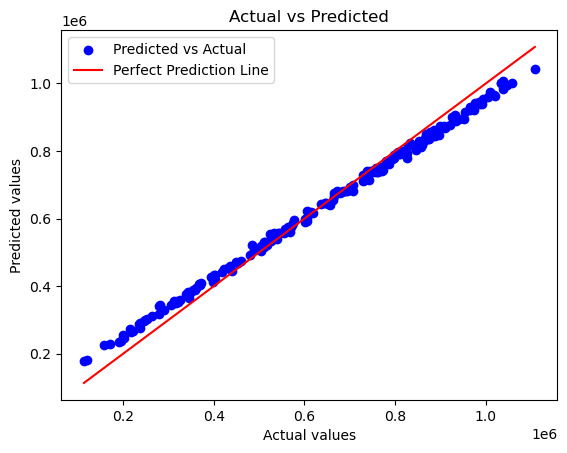

In [24]:
# Plot actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Baseline (y = x) when actual value and predicted values are same
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Prediction Line')

plt.title('Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()

plt.show()

In this code, we first set a random seed using `np.random.seed(42)` to ensure that the results are reproducible across different runs. By setting the seed, we control the random processes like data splitting and model initialization so that the outcome remains consistent every time the code is executed. This step is essential to avoid slight variations in model performance metrics, which can arise due to the random nature of data shuffling or optimization processes.

Next, we split the dataset into training and test sets with an 80-20 ratio. This means 80% of the data is used to train the ElasticNet model, while the remaining 20% is reserved for testing its predictive performance. The ElasticNet model was initialized with specific parameters: `alpha=0.5`, `l1_ratio=0.7`, `max_iter=1000`, and `tol=1e-4`. These parameters control the regularization strength and the balance between L1 (Lasso) and L2 (Ridge) penalties. The model was then trained on the training set using the `.fit()` method.

After training, we used the trained model to predict outcomes for the test data. The predicted values were compared against the actual values, and the **Mean Squared Error (MSE)** was calculated to assess the accuracy of the model. The lower the MSE, the better the model fits the data. Additionally, we computed the **R-squared (R²)** value, which indicates how well the model explains the variance in the target variable. In this case, the model achieved an R-squared value of **0.9839**, meaning it explains approximately **98.39%** of the variance in the house prices, which is a strong indication of the model's effectiveness.

The final output includes the model's **coefficients**, which represent the weights assigned to each feature, and the **intercept**, which is the baseline prediction when all feature values are zero. The MSE of **984,633,576.5011** indicates a reasonable prediction error, while the high R-squared value confirms that the model performs well in predicting the target values.


### Cross-Validation Implementation

In [25]:
def cross_validation_implementation(X, y, num_splits=5, seed=42):
    """Split the data into num_splits folds for cross-validation."""
    
    np.random.seed(seed)  # Set seed for reproducibility
    fold_size = len(X) // num_splits
    index_array = np.arange(len(X))
    np.random.shuffle(index_array)  # Shuffle the indices to randomize the data splits
    
    for fold in range(num_splits):
        # Assign indices for the test and training data based on the current fold
        test_indices = index_array[fold * fold_size:(fold + 1) * fold_size]
        train_indices = np.concatenate([index_array[:fold * fold_size], index_array[(fold + 1) * fold_size:]])
        yield X[train_indices], X[test_indices], y[train_indices], y[test_indices]

# Usage example
num_splits = 5  # Number of folds
for X_train, X_test, y_train, y_test in cross_validation_implementation(X, y, num_splits, seed=42):
    model = Elasticnet(alpha=0.5, l1_ratio=0.7)  # Adjust model parameters as needed
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate and print evaluation metrics like MSE or R-squared for each fold
    mse = np.mean((y_test - y_pred) ** 2)
    total_variance = np.sum((y_test - np.mean(y_test)) ** 2)
    unexplained_variance = np.sum((y_test - y_pred) ** 2)
    r_squared = 1 - (unexplained_variance / total_variance)
    
    print(f'Fold MSE: {mse:.4f}, R-squared: {r_squared:.4f}')


Fold MSE: 1386812665.3298, R-squared: 0.9785
Fold MSE: 1098031569.3441, R-squared: 0.9823
Fold MSE: 1097370006.3309, R-squared: 0.9827
Fold MSE: 1014862262.0156, R-squared: 0.9840
Fold MSE: 1434911882.0146, R-squared: 0.9788


In this code, we are performing **5-fold cross-validation** to evaluate the performance of an ElasticNet model. The function `cross_validation_split()` is responsible for splitting the dataset into `k` folds, ensuring that each fold is used as a test set once while the remaining data is used as the training set. By setting a **random seed** (`random_seed=42`), we ensure that the random shuffling of the data remains consistent across runs, making our results reproducible.

The process begins by shuffling the indices of the dataset and then partitioning it into `k` equal parts, or folds. Each fold acts as a test set while the other `k-1` folds are combined to create the training set. This ensures that the model is trained and tested multiple times on different subsets of the data, providing a more robust evaluation of the model's generalization ability.

Once the data is split, the **ElasticNet model** is initialized with regularization parameters `alpha=0.5` and `l1_ratio=0.7`. For each fold, the model is trained using the training data, and predictions are made on the test data. The performance of the model is then evaluated using two key metrics: **Mean Squared Error (MSE)** and **R-squared**. MSE measures the average squared difference between the actual and predicted values, with lower values indicating better model performance. R-squared is a statistical measure that indicates how well the model explains the variance in the data, with values closer to 1 indicating a better fit.

The output shows the MSE and R-squared for each fold. Across the five folds, we observe that the MSE values range from **1.01 billion to 1.44 billion**, while the R-squared values consistently stay above **0.978**, indicating that the model is performing well across all folds. The high R-squared values suggest that the model is able to explain approximately **97.8% to 98.4%** of the variance in the test data, demonstrating strong predictive capabilities. By using cross-validation, we are able to confirm that the model generalizes well across different subsets of the data, reducing the risk of overfitting.

This process of cross-validation provides a more reliable evaluation of the model’s performance than a single train-test split, ensuring that our model can handle various data distributions effectively.


###  Visualizing the Results

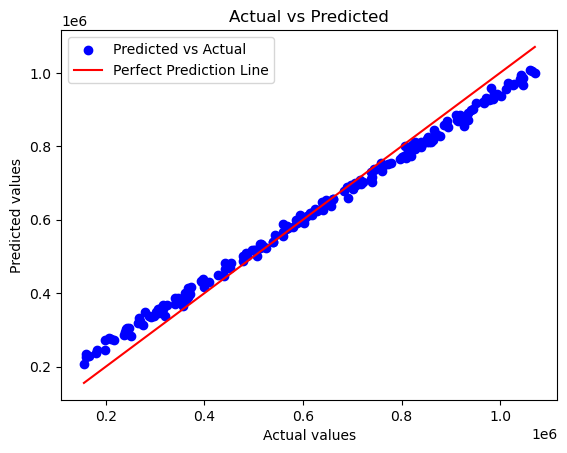

In [26]:
# Plot actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Baseline (y = x) when actual value and predicted values are same
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Prediction Line')

plt.title('Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()

plt.show()

 The scatter plot above illustrates the relationship between the actual house prices and the predicted values generated by the ElasticNet model. The blue dots represent the predicted values plotted against the actual values. The red line represents the "Perfect Prediction Line," which would indicate a perfect fit where every predicted value equals the actual value. 

 From the graph, we can observe that most of the data points closely follow the red line, indicating that the model's predictions are generally accurate. The alignment suggests that the model is able to make predictions with high precision, as indicated by the closeness of the points to the perfect prediction line.

### Histogram of Actual vs Predicted Values

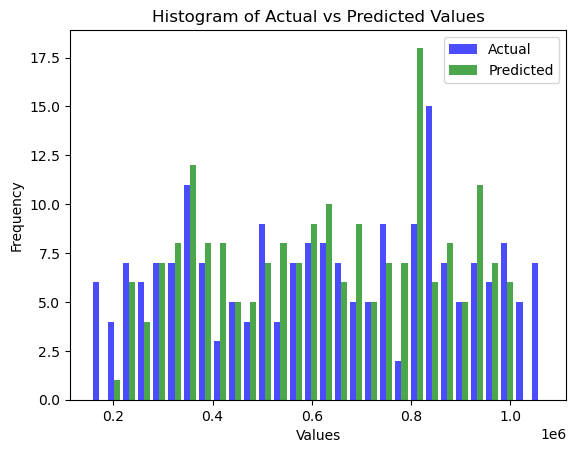

In [27]:

# Plot a histogram of actual vs predicted values
plt.hist([y_test, y_pred], bins=30, color=['blue', 'green'], label=['Actual', 'Predicted'], alpha=0.7)

# Adding titles and labels for hisotgram plot 
plt.title('Histogram of Actual vs Predicted Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()

# Display the histogram
plt.show()


 The histogram above compares the distribution of the actual (blue) and predicted (green) house prices. Both distributions have similar shapes, which indicates that the model's predictions are well-aligned with the actual data. 

 Some variations in the heights of the bars may reflect areas where the model slightly over- or under-predicts certain values, but overall, the graph suggests that the model captures the general trend of the data quite well across different ranges of house prices.
